In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from nscl.models.embedding.attribute_embedding_space import *
from nscl.datasets.clevr_definition import *
from torch import optim

In [4]:
# dimensions
input_dim = 64
output_dim = 8
all_shapes = CLEVRDefinition.attribute_concept_map['shape']

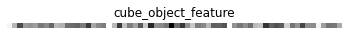

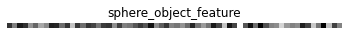

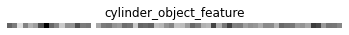

In [5]:
# Generate synthetic features
shape_features = {shape:torch.randn((1,input_dim)) for shape in all_shapes}
for shape, features in shape_features.items():
    plt.figure()
    plt.axis("off")
    plt.title(f'{shape}_object_feature')
    plt.imshow(features, cmap='gray')

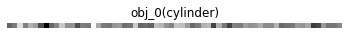

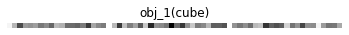

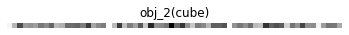

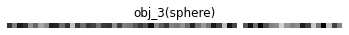

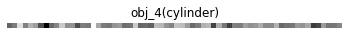

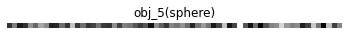

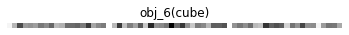

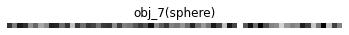

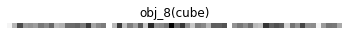

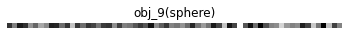

In [6]:
# Generate synthetic dataset
class EmbeddingDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return len(self.features)

num_data_per_shape = 100
shape_to_id = {'cube':0, 'sphere':1, 'cylinder':2}
id_to_shape = {0:'cube', 1:'sphere', 2:'cylinder'}

scenes = []
scene_labels = []

for i in range(num_data_per_shape):
    for shape in all_shapes:
        scenes.append(shape_features[shape])
        scene_labels.append(shape_to_id[shape])

dataset = EmbeddingDataset(scenes, scene_labels)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, drop_last=True)
for features, shape_ids in dataloader:
    for i in range(len(features)):
        plt.figure()
        plt.axis("off")
        plt.title(f'obj_{i}({id_to_shape[shape_ids[i].item()]})')
        plt.imshow(features[i], cmap='gray')
    break


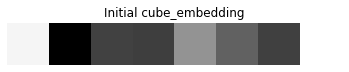

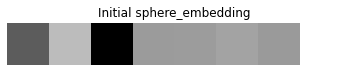

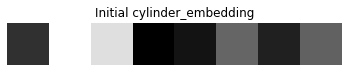

In [7]:
# Generate embedding space
attribute_concept_map = {'shape':['cube', 'sphere', 'cylinder']}
embedding_space = AttributeEmbeddingSpace(attribute_concept_map, input_dim, output_dim)

# initial embeddings
for shape in all_shapes:
    plt.figure()
    plt.axis("off")
    plt.title(f'Initial {shape}_embedding')
    plt.imshow(getattr(embedding_space.concept_embeddings, shape).concept_vector.data.unsqueeze(1).t(), cmap='gray')

In [8]:
# Test similarity computation
scene = torch.cat([scenes[0], scenes[1], scenes[2]])
print(embedding_space.similarity(scene, 'cube'))

tensor([0.7233, 0.0328, 0.9855], grad_fn=<SigmoidBackward>)


In [15]:
# Train embedding space
num_epoch = 10
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, drop_last=True)
loss_function = nn.MSELoss()
optimiser = optim.Adam(embedding_space.parameters(), lr=0.01)

for i in range(num_epoch):
    for features, shape_ids in dataloader:
        for feature, shape_id in zip(features, shape_ids):
            shape = id_to_shape[shape_id.item()]
            confidence = embedding_space.similarity(feature, shape)
            loss = loss_function(confidence, torch.tensor([1.]))
            loss.backward()
            optimiser.step()


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


KeyboardInterrupt: 

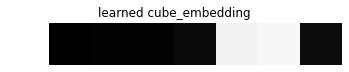

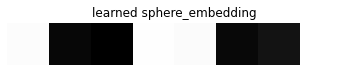

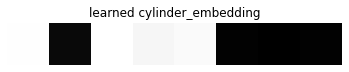

In [10]:
# Learned concept_embeddings
for shape in all_shapes:
    plt.figure()
    plt.axis("off")
    plt.title(f'learned {shape}_embedding')
    plt.imshow(getattr(embedding_space.concept_embeddings, shape).concept_vector.data.unsqueeze(1).t(), cmap='gray')

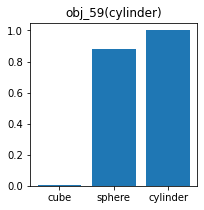

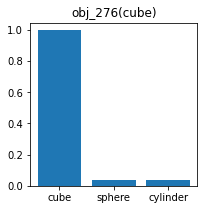

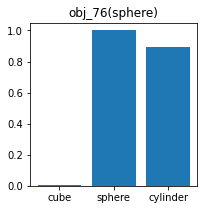

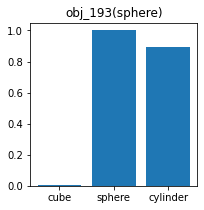

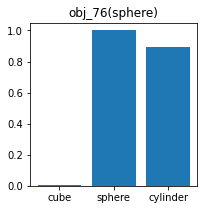

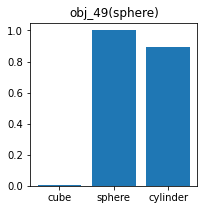

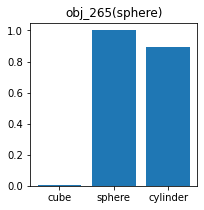

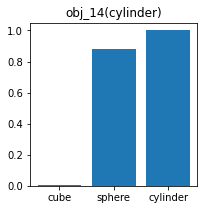

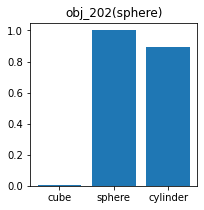

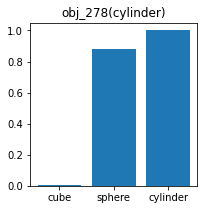

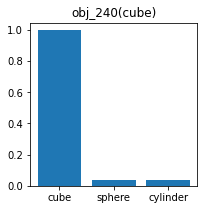

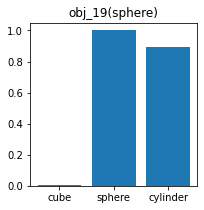

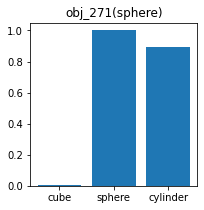

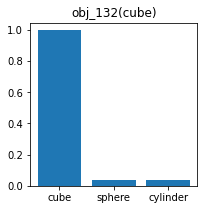

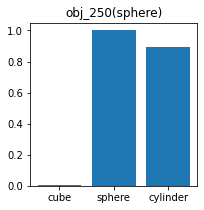

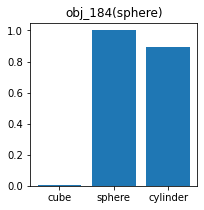

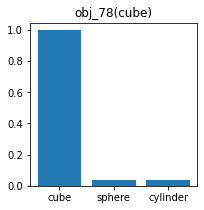

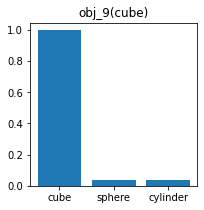

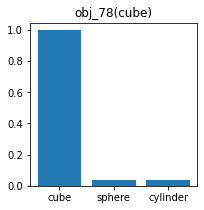

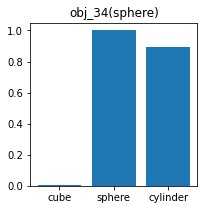

In [11]:
# Check accuracy
for i in np.random.randint(0, len(scenes), 20):
    scene = scenes[i]
    similarties = []
    for shape in all_shapes:
        similarties.append(embedding_space.similarity(scene, shape).item())
    plt.figure(figsize=(3,3))
    plt.title(f'obj_{i}({id_to_shape[scene_labels[i]]})')
    plt.bar(all_shapes, similarties)

In [12]:
# get_attribute
obj1 = scenes[0][0]
obj2 = scenes[1][0]
obj3 = scenes[2][0]
obj4 = scenes[3][0]
print(f'object1_shape : {scene_labels[0]}')
print(f'object2_shape : {scene_labels[1]}')
print(f'object3_shape : {scene_labels[2]}')
print(f'object4_shape : {scene_labels[3]}')
print(f'get_attribute(obj1, shape): {embedding_space.get_attribute(obj1, "shape")}')
print(f'get_attribute(obj2, shape): {embedding_space.get_attribute(obj2, "shape")}')
print(f'get_attribute(obj3, shape): {embedding_space.get_attribute(obj3, "shape")}')
print(f'get_attribute(obj4, shape): {embedding_space.get_attribute(obj4, "shape")}')

object1_shape : 0
object2_shape : 1
object3_shape : 2
object4_shape : 0
get_attribute(obj1, shape): tensor([0.9323, 0.0342, 0.0336], grad_fn=<DivBackward0>)
get_attribute(obj2, shape): tensor([0.0015, 0.5268, 0.4716], grad_fn=<DivBackward0>)
get_attribute(obj3, shape): tensor([0.0012, 0.4675, 0.5312], grad_fn=<DivBackward0>)
get_attribute(obj4, shape): tensor([0.9323, 0.0342, 0.0336], grad_fn=<DivBackward0>)


In [13]:
# is_attribute_equal
obj1 = scenes[0][0]
obj2 = scenes[1][0]
obj3 = scenes[2][0]
obj4 = scenes[3][0]

print(f'obj1_shape : {id_to_shape[scene_labels[0]]}')
print(f'obj2_shape : {id_to_shape[scene_labels[1]]}')
print(f'obj3_shape : {id_to_shape[scene_labels[2]]}')
print(f'obj4_shape : {id_to_shape[scene_labels[3]]}')

obj1_concept = embedding_space.get_attribute(obj1, "shape")
obj2_concept = embedding_space.get_attribute(obj2, "shape")
obj3_concept = embedding_space.get_attribute(obj3, "shape")
obj4_concept = embedding_space.get_attribute(obj4, "shape")

print(obj1_concept)

print(f'ae(obj1, obj2, shape) : {embedding_space.is_attribute_equal(obj1_concept, obj2_concept, "shape")}')
print(f'ae(obj1, obj3, shape) : {embedding_space.is_attribute_equal(obj1_concept, obj3_concept, "shape")}')
print(f'ae(obj1, obj4, shape) : {embedding_space.is_attribute_equal(obj1_concept, obj4_concept, "shape")}')
print(f'ae(obj2, obj3, shape) : {embedding_space.is_attribute_equal(obj2_concept, obj3_concept, "shape")}')
print(f'ae(obj2, obj4, shape) : {embedding_space.is_attribute_equal(obj2_concept, obj4_concept, "shape")}')
print(f'ae(obj3, obj4, shape) : {embedding_space.is_attribute_equal(obj3_concept, obj4_concept, "shape")}')

obj1_shape : cube
obj2_shape : sphere
obj3_shape : cylinder
obj4_shape : cube
tensor([0.9323, 0.0342, 0.0336], grad_fn=<DivBackward0>)


AttributeError: 'AttributeEmbeddingSpace' object has no attribute 'is_attribute_equal'

In [14]:
indices_vector = torch.tensor(list(range(3)))
a = torch.tensor([0.1, 0.1, 0.8])
b = torch.tensor([0.1, 0.7, 0.2])
print(a * b)
(a * b).sum()




tensor([0.0100, 0.0700, 0.1600])


tensor(0.2400)